
### Find or create appropriate data that can be analyzed - DSC550

### Students performance in exams
Marks secured by the students in college

To understand the influence of various factors like economic, personal and social on the students performance
Inferences would be :

1. How to imporve the students performance in each test ?
2. What are the major factors influencing the test scores ?
3. Effectiveness of test preparation course?
4. Other inferences

https://www.kaggle.com/soukhnaw/student-performance-analysis/edit

https://www.kaggle.com/roshansharma/student-performance-analysis


### Load libraries needed

### Case Study:  Testing  Hypothesis

Hypothesis:  To understand the influence of the parents background, test preparation etc on students performance

###  And more likely to be published by "Students Performance in Exams" sources

#NOTE: This case study is not complete!  We are only using the first part of it to practice Graphic Analytics.



In [20]:

#Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# Use to configure display of graph
%matplotlib inline   

#stop unnecessary warnings from printing to the screen
warnings.simplefilter('ignore')


#### Initialize the required values ( we will use them later in the program )
#### we will set the minimum marks to 40 to pass in a exam

In [21]:
passmark = 40

#### Read the data from the csv file

In [22]:
#Step 1:  Load data into a dataframe
import pandas as pd

# Read in the StudentsPerformance data set (given as a .csv file) from the local directory
df = pd.read_csv("StudentsPerformance.csv")  



In [23]:
#We will print top few rows to understand about the various data columns
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
#Size of data frame
#print (df.shape)
df.shape

(1000, 8)

In [25]:
#understand about the basic information of the data, like min, max, mean and standard deviation 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
#Some EDA
# Let's talk about gender ,Race,Parental education and lunch
gender=df["gender"]
#Race
race=df["race/ethnicity"]

#Some Parental Education
PE=df["parental level of education"]

#Some Lunch Data
lunch=df["lunch"]

In [27]:
#check for any missing values or null values (NA or NaN)
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### the above result in this dataframe showing no missing values otherwise in the in real scenarios we need work on dataset with a lot of missing values

In [28]:
#Lets add columns of total score and average
df["Total_Score"]=df["math score"]+df["reading score"]+df["writing score"]
df["Percentage"]=(df["Total_Score"]/300)*100

In [29]:
#Some Result
print(df[df["Percentage"]==max(df["Percentage"])])
#So 2 Female out of 3 got 100% marks.
print(df[df["Percentage"]==min(df["Percentage"])])
#One Female got lowest percentage

     gender race/ethnicity parental level of education     lunch  \
458  female        group E           bachelor's degree  standard   
916    male        group E           bachelor's degree  standard   
962  female        group E          associate's degree  standard   

    test preparation course  math score  reading score  writing score  \
458                    none         100            100            100   
916               completed         100            100            100   
962                    none         100            100            100   

     Total_Score  Percentage  
458          300       100.0  
916          300       100.0  
962          300       100.0  
    gender race/ethnicity parental level of education         lunch  \
59  female        group C            some high school  free/reduced   

   test preparation course  math score  reading score  writing score  \
59                    none           0             17             10   

    Total_Score  Perce

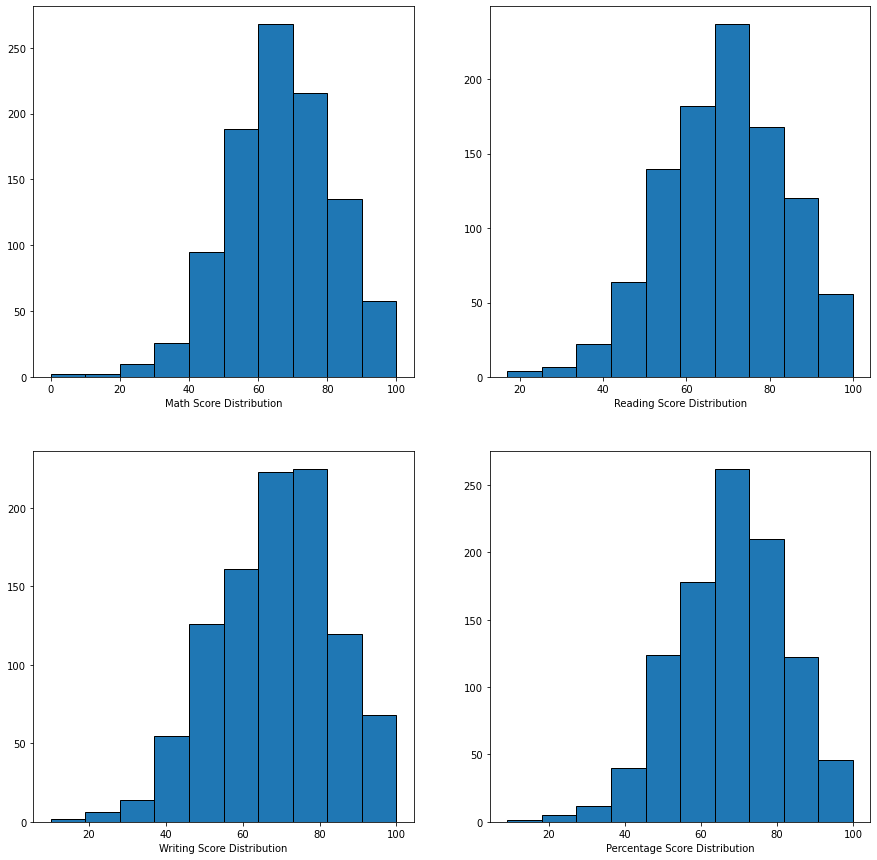

In [30]:
#Plotting all the Distrbutions of all marks
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0,0].hist(df["math score"],edgecolor="black")
axs[0,0].set_xlabel('Math Score Distribution')
axs[0,1].hist(df["reading score"],edgecolor="black")
axs[0,1].set_xlabel('Reading Score Distribution')
axs[1,0].hist(df["writing score"],edgecolor="black")
axs[1,0].set_xlabel('Writing Score Distribution')
axs[1,1].hist(df["Percentage"],edgecolor="black")
axs[1,1].set_xlabel('Percentage Score Distribution')
plt.show()


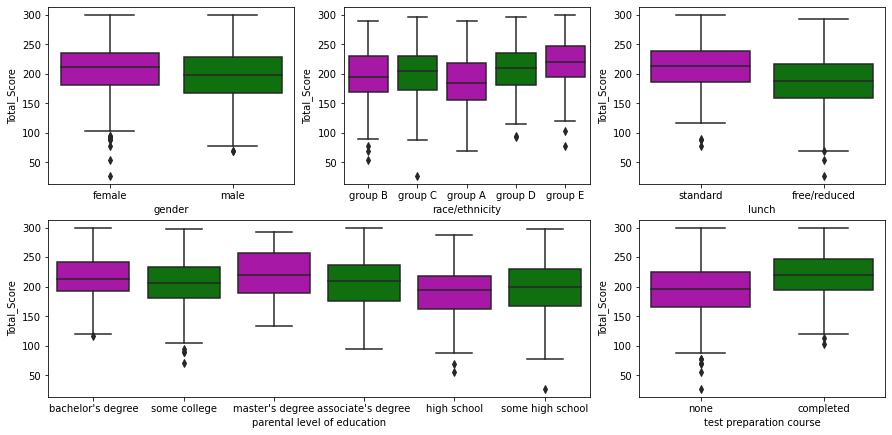

In [31]:
import seaborn as sns

#Distributions of score based on different categories
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((4,3), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((4,3), (0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((4,3), (0,2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((4,3), (1,0), rowspan=1, colspan=2)
ax5 = plt.subplot2grid((4,3), (1,2), rowspan=1, colspan=1)


sns.boxplot(x=df["gender"], y=df["Total_Score"], palette=["m", "g"],ax=ax1)
sns.boxplot(x=df["race/ethnicity"], y=df["Total_Score"], palette=["m", "g"],ax=ax2)

sns.boxplot(x=df["lunch"], y=df["Total_Score"], palette=["m", "g"],ax=ax3)
sns.boxplot(x=df["parental level of education"], y=df["Total_Score"], palette=["m", "g"],ax=ax4)
sns.boxplot(x=df["test preparation course"], y=df["Total_Score"], palette=["m", "g"],ax=ax5)
plt.show()


In [32]:
# Data Exploration

df_correlation = df.corr()

df_correlation

,math score,reading score,writing score,Total_Score,Percentage
math score,1.000000,0.817580,0.802642,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965667
Total_Score,0.918746,0.970331,0.965667,1.000000,1.000000
Percentage,0.918746,0.970331,0.965667,1.000000,1.000000


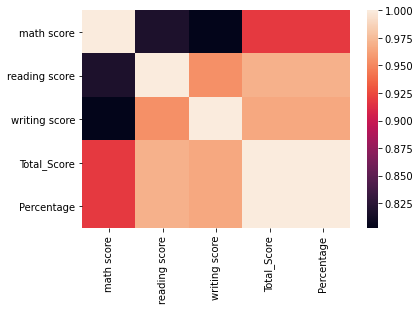

In [33]:
#COORELATION
Mdf = df
Corr=Mdf.corr()
sns.heatmap(Corr)
plt.show()

In [34]:
Mdf["Result"]=[1 if i>=40  else 0 for i in Mdf["Percentage"] ]

In [35]:
#Let's some machine learning
from sklearn.model_selection import train_test_split

X_df=Mdf.loc[:,"gender":"test preparation course"]
Y_df=Mdf["Result"]
X_train,X_test,Y_train,Y_test=train_test_split(X_df,Y_df,test_size=0.2,random_state=28)


In [37]:
#My Favourite
from sklearn.tree import DecisionTreeClassifier

DTree=DecisionTreeClassifier()
DTree.fit(X_train.values,Y_train)

Y_predict=DTree.predict(X_test.values)

ValueError: could not convert string to float: 'female'

In [ ]:
#I think this accuracy score is enough
from sklearn.metrics import f1_score
f1_score(Y_predict,Y_test)

In [ ]:
#  https://www.kaggle.com/soukhnaw/students-performance-in-exams/edit?rvi=1
#  https://www.kaggle.com/abhinavkr28/students-performance-in-exams/notebook
    



### Explore the Reading score

In [ ]:
# explore the Reading score
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

### To find out the number of studends who passed in reading 

In [ ]:
#how many studends passed in reading ?
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()


In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### END of Exploring the Reading Score

### Explore the Math Score first

In [ ]:
#explore the Math Score first
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### How many students passed in mathematic exam ?

In [ ]:
#how many students passed in Math exam ?
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### End of Explore the Math Score first

#### Explore writing Score

In [ ]:
#explore writing score
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### The number of students who passed writing 

In [ ]:
#how many students passed writing ?
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()


In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### Check  the number of students who passed in all the subjects

In [ ]:
#How many students passed in all the subjects ?
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

In [ ]:
#df.OverAll_PassStatus.value_counts()

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 


###  To Find the percentage of marks


In [ ]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

In [ ]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 


### Assign the grades
### Grading
### above 90 = A Grade
### 70 to 80 = B Grade
### 60 to 70 = C Grade
### 50 to 60 = D Grade
### 40 to 50 = E Grade
### below 40 = F Grade which  means Fail 

In [ ]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 90 ):
        return 'A'
    if ( Percentage >= 70):
           return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()
    

### Plot the grades obtained in an order

In [ ]:
#Plot the grades obtained in an order
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 